In [1]:
!pwd

/Users/adebayoakinlalu/Jupyterdir/zendesk_exercise


In [2]:
!head -n 2 zendesk*

QuestionID	Question	DocumentID	DocumentTitle	SentenceID	Sentence	Label
Q1	how are glacier caves formed?	D1	Glacier cave	D1-0	A partly submerged glacier cave on Perito Moreno Glacier .	0


In [48]:
## Install python3.7 and above for the codes to work

## Load the python modeules

import os
import sys
import logging
from dataclasses import dataclass

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
#sns.set_style("whitegrid")

import plotly_express as px

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

In [49]:
#Identify the file in folder
for file in os.listdir(os.curdir):
    if file.startswith('zendesk'):
        print(f'csv file needed: {file}')

csv file needed: zendesk_challenge (1) (1) (1) (2) (1) (1) (1).tsv


### Load the data into dataframe

In [50]:
df = pd.read_csv('zendesk_challenge (1) (1) (1) (2) (1) (1) (1).tsv', delimiter='\t',encoding='utf-8')

### Priminary Analysis

1.  Sample of the dataset

In [51]:
df.sample(5)

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
9380,Q1324,what track and field event for me?,D1266,Track and field,D1266-5,The International Association of Athletics Federations is the international governing body for track and field.,0
3469,Q485,how was the phone invented,D478,Invention of the telephone,D478-0,An actor portraying Alexander Graham Bell speaking into an early model telephone.,0
7572,Q1063,what is a right wing christian,D1026,Christian right,D1026-2,"In the U.S., the Christian right is an informal coalition formed around a core of evangelical Protestants that draws ""support from politically conservative Catholics, Jews, Mormons, and occasionally secularists"" who share their goals.",0
10401,Q1482,what machines are called Les Flippers in France?,D1408,Bally Technologies,D1408-0,"Bally Technologies, Inc. is a manufacturer of slot machines and other gaming technology based in Las Vegas, Nevada .",0
11976,Q1738,what radio station are the boston bruins on?,D1647,Boston Bruins Radio Network,D1647-3,Bob Beers provides color commentary .,0


In [7]:
f'2. Total number of observations:  {len(df)}'

'2. Total number of observations:  20347'

In [52]:
print(f'3. Are any null in the features? \n\n {df.isnull().sum()}')

3. Are any null in the features? 

 QuestionID       0
Question         0
DocumentID       0
DocumentTitle    0
SentenceID       0
Sentence         0
Label            0
dtype: int64


In [53]:
f'4. How many of observations that are dublicates?: {df.duplicated().sum()}'

'4. How many of observations that are dublicates?: 0'

In [54]:
print('5. Number of dublicates and unique values per feature')
print('----------------------------------------------------')
def determine_number_duplicated(df:pd.DataFrame, col:str='QuestionID')-> str:
    '''
    The function prints out the number of duplicate in the dataframe features
    
    Parameters:
    ---------
    df: DataFrame
    col: str 
    
    print: str
    
    '''
    print(f'The number of duplicate and unique value in {col} is {df.duplicated(subset=[col]).sum()} and {df[col].nunique()}' )

for col in df.columns:
    determine_number_duplicated(df, col)

5. Number of dublicates and unique values per feature
----------------------------------------------------
The number of duplicate and unique value in QuestionID is 18230 and 2117
The number of duplicate and unique value in Question is 18230 and 2117
The number of duplicate and unique value in DocumentID is 18353 and 1994
The number of duplicate and unique value in DocumentTitle is 18353 and 1994
The number of duplicate and unique value in SentenceID is 1519 and 18828
The number of duplicate and unique value in Sentence is 1539 and 18808
The number of duplicate and unique value in Label is 20345 and 2


**Inference**:  
1.  It appears that every question/DocumentTitle repeats many times and why?
2.  However, sentence feature has lower number of duplicates. It seems every unique question has more than one sentences.  

#### Understand the relationship between Question and Sentence variable

In [55]:
print(df.groupby(['Question'])['SentenceID'].count().sort_values(ascending=False).head(1))
print(df.groupby(['Question'])['SentenceID'].count().sort_values(ascending=False).tail(1))

Question
how long is a flat membrane roof good for?    30
Name: SentenceID, dtype: int64
Question
what holiday is first weekend of september    1
Name: SentenceID, dtype: int64


**Inference**:  
The highest number of sentences per question is 30 and the lowest is 1

In [56]:
print(df.groupby(['QuestionID', 'Sentence'])['SentenceID'].count().sort_values(ascending=False).head(5))

QuestionID  Sentence                                                                                                                                        
Q1368       Emergency!                                                                                                                                          2
Q1029       right                                                                                                                                               2
Q999        Kris Nathan Humphries (born February 6, 1985) is an American professional basketball player with the Brooklyn Nets .                                1
Q1921       This page is a list of characters in the Police Academy film and television series.                                                                 1
Q192        The Chicago Blizzard of 1979 was a major blizzard that affected northern Illinois and northwest Indiana , U.S. on January 13 – January 14, 1979.    1
Name: SentenceID, dtype: int64


**Inference:**  
This outcome contracts what was believed to be that every unique question has more than one sentences. QuestionID (Q1368 and Q1029) have duplicate sentences which seems like anomalies 

In [57]:
##Filter out the two questionIds (Q1368 and Q1029) in the dataset
cm = sns.light_palette("green", as_cmap=True)

df[(df['QuestionID']=='Q1368') | (df['QuestionID']=='Q1029')].loc[[7328,7329,9637, 9641], :]

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
7328,Q1029,what are sanuks made of,D992,Sanuk,D992-0,right,0
7329,Q1029,what are sanuks made of,D992,Sanuk,D992-1,right,0
9637,Q1368,who starred in the drama emergency,D1306,Emergency!,D1306-0,Emergency!,0
9641,Q1368,who starred in the drama emergency,D1306,Emergency!,D1306-4,Emergency!,0


**Inference:**  
Despite having different SentenceID, I believe one of each duplicate questions should be dropped from the dataset

In [58]:
##Remove two rows from index 7328 and 9637 from dataframe
new_df = df.copy()
new_df.drop([7328, 9637], inplace=True)

In [20]:
new_df[(new_df['QuestionID']=='Q1368') | (new_df['QuestionID']=='Q1029')]

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
7329,Q1029,what are sanuks made of,D992,Sanuk,D992-1,right,0
7330,Q1029,what are sanuks made of,D992,Sanuk,D992-2,"Sanuk, a division of Deckers Outdoor Corporation , is a footwear brand based in Southern California .",0
7331,Q1029,what are sanuks made of,D992,Sanuk,D992-3,"Sanuk, the Thai word for fun, was founded by Southern California native Jeff Kelley when he started making sandals out of indoor-outdoor carpet .",0
7332,Q1029,what are sanuks made of,D992,Sanuk,D992-4,"The first product created was green carpeted and entitled the ""Fur Real"" after one shop owner asked if the novelty sandal was ""For Real.""",0
7333,Q1029,what are sanuks made of,D992,Sanuk,D992-5,The Fur Real first became a runaway hit through boutique stores and not the intended surf shops .,0
7334,Q1029,what are sanuks made of,D992,Sanuk,D992-6,"The novelty act was followed up by a sandal wrapped in wire mesh, a leopard print version, and styles made out of a poncho material in a variety of colors.",0
7335,Q1029,what are sanuks made of,D992,Sanuk,D992-7,"Sanuk has grown to include style options for men, women and youth and is distributed across the United States and in over 50 countries throughout Europe , Asia , South America and Australia .",0
7336,Q1029,what are sanuks made of,D992,Sanuk,D992-8,"Sanuk centers itself around a positive lifestyle advocating the slogan, ""Smile,Pass it on!"".",0
9638,Q1368,who starred in the drama emergency,D1306,Emergency!,D1306-1,is an American television series that combines the medical drama and action-adventure genres.,0
9639,Q1368,who starred in the drama emergency,D1306,Emergency!,D1306-2,It was produced by Mark VII Limited and distributed by Universal Studios .,0


**Inference:**  
The anomaly rows have been removed

### Distribution in the features

1. Distribution of Target Variables

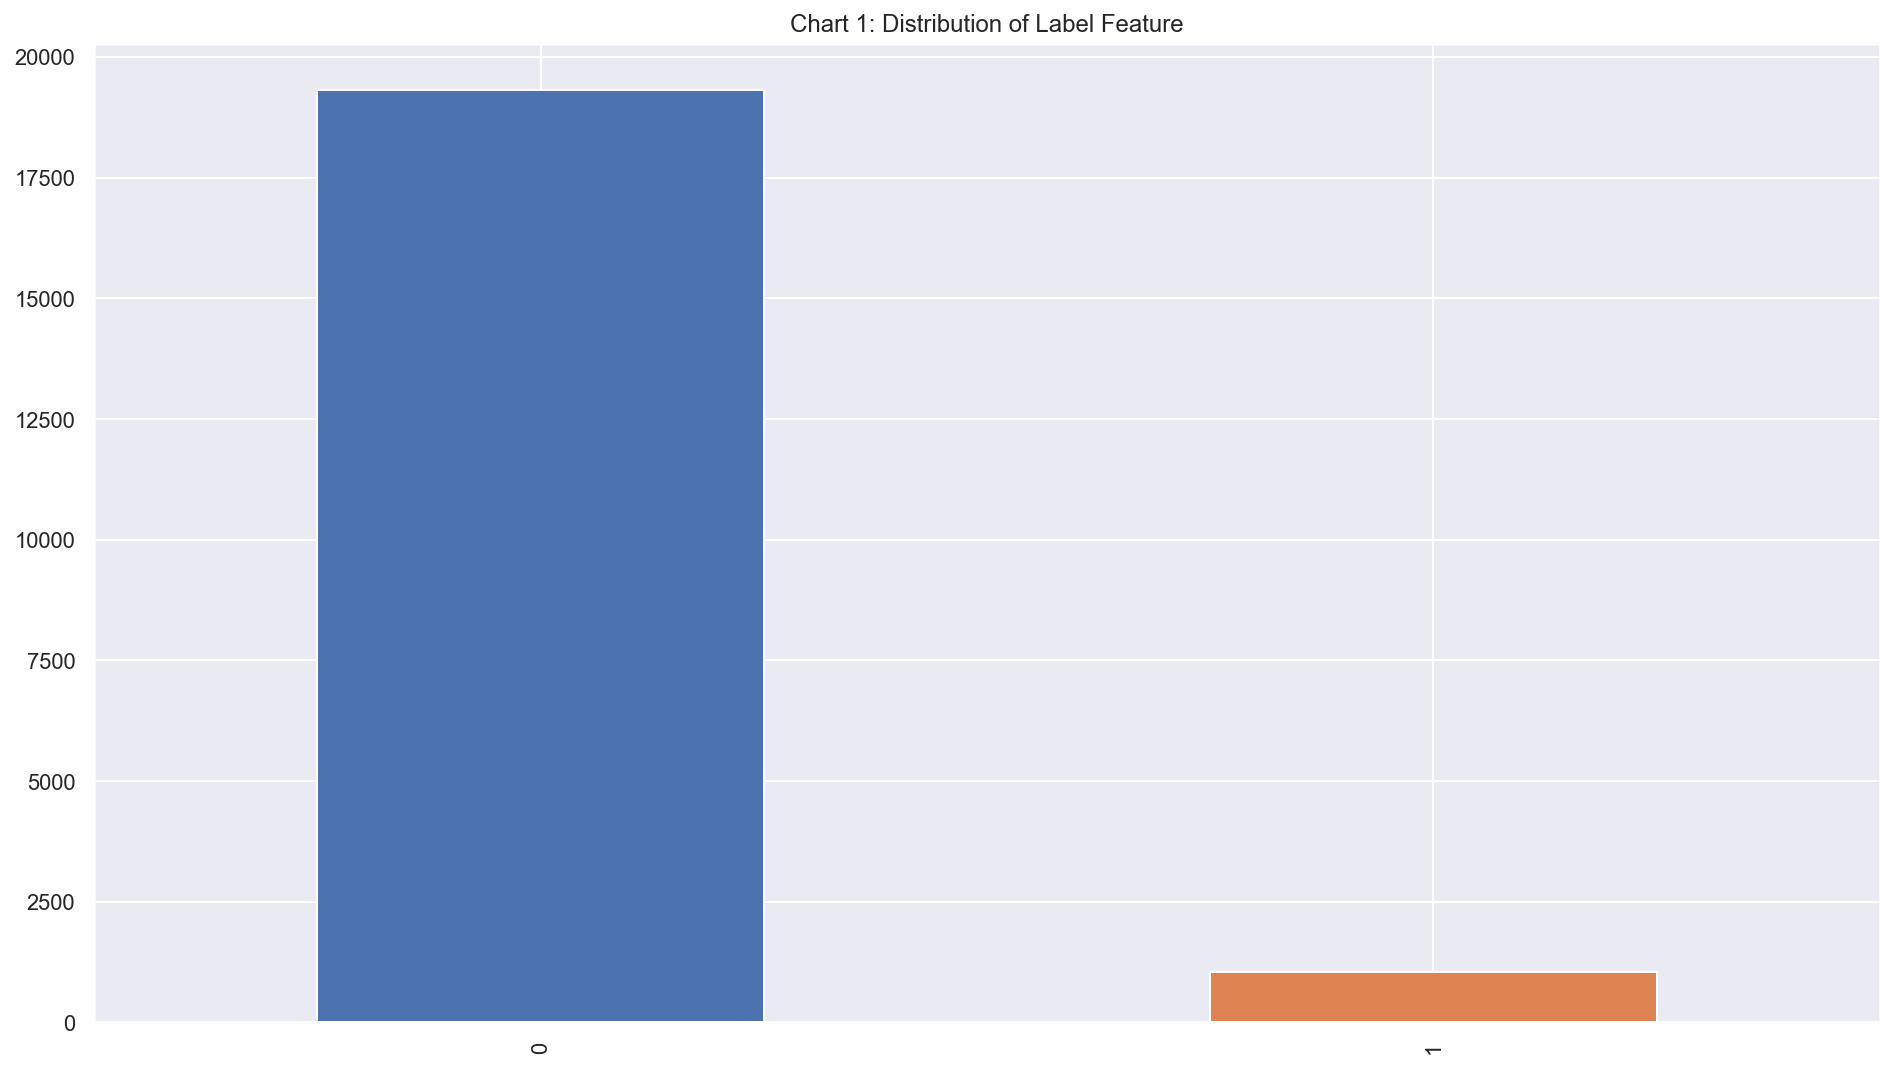

In [59]:
### Distribution of Label Feature
new_df["Label"].value_counts().plot(kind='bar', title="Chart 1: Distribution of Label Feature")

**Inference:**   
1. This is indication of imbalance classes
2. This could be fixed by resampling the dataset or generating sythetic dataset to increase data points in lower class 

2. Distribution of questions with number of Sentences

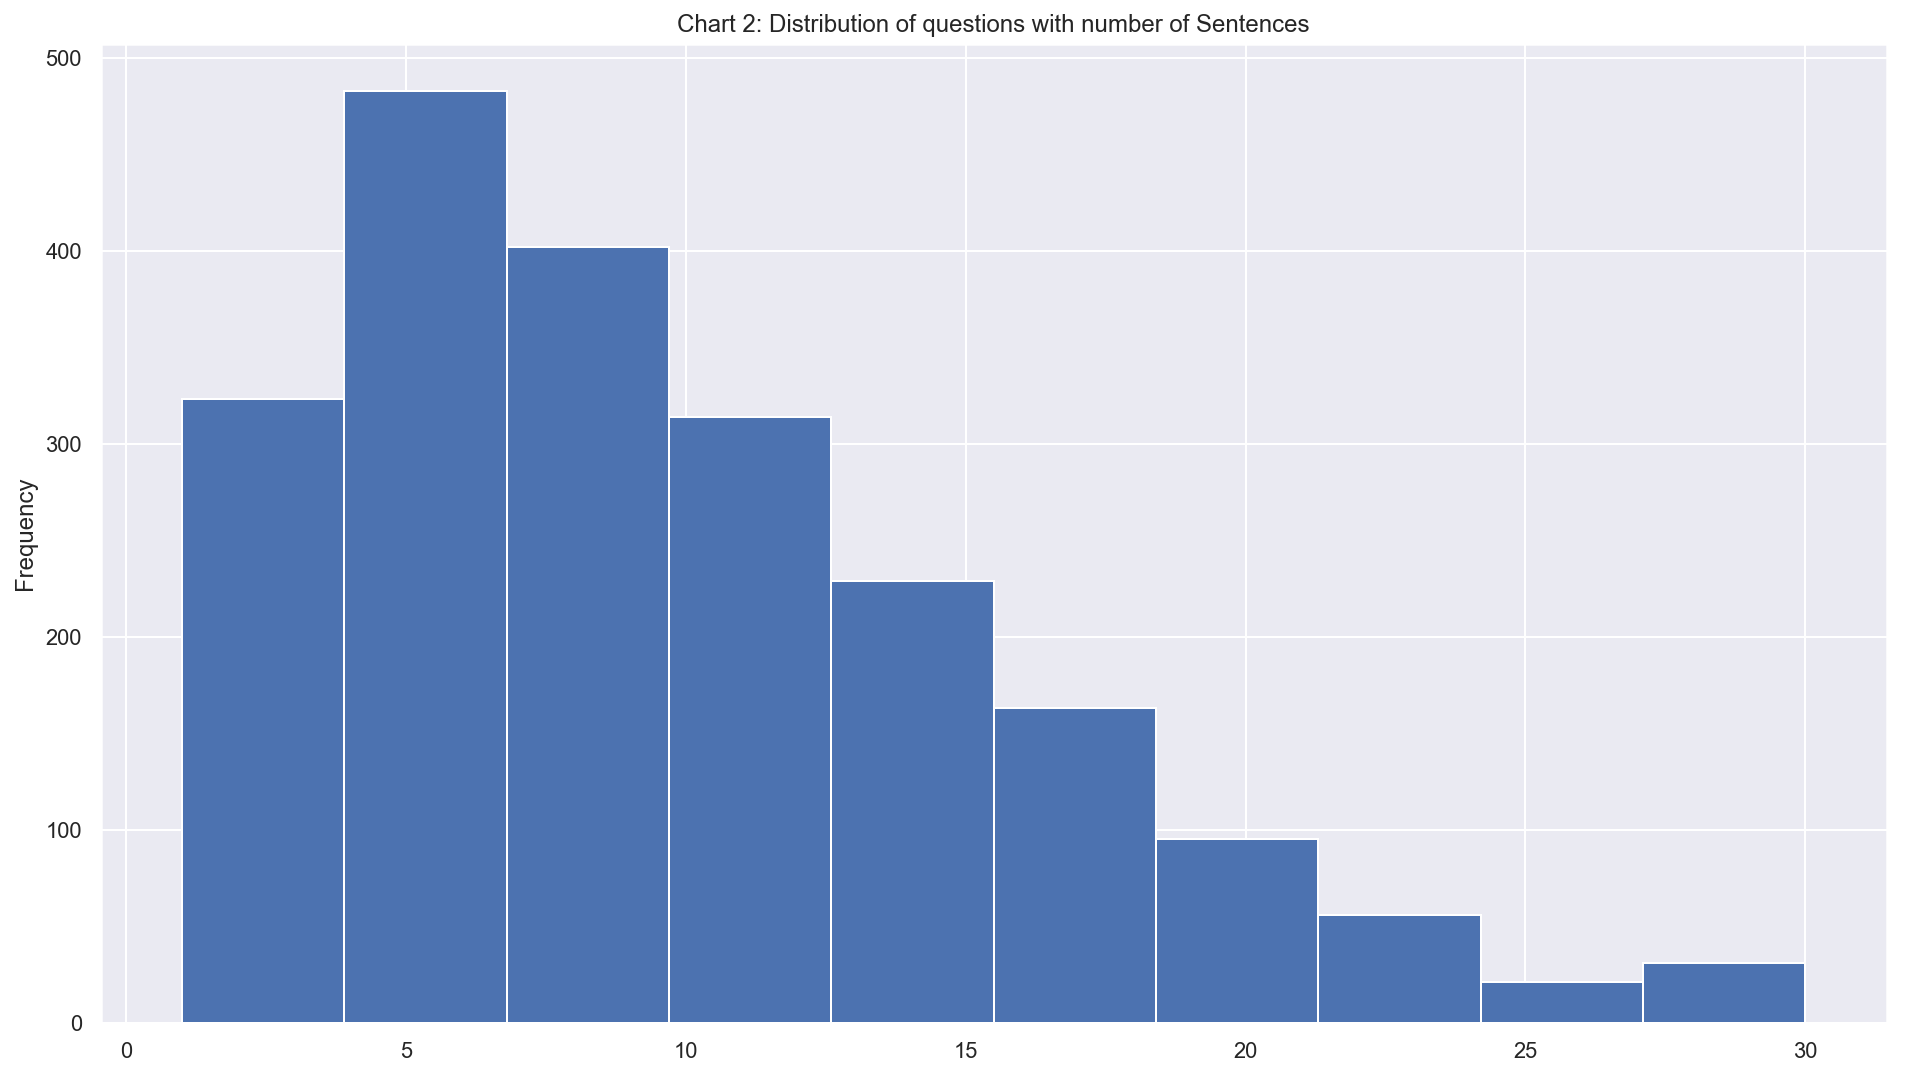

In [60]:
##Distribution of questions with number of Sentences

new_df["QuestionID"].value_counts().plot(kind='hist', title="Chart 2: Distribution of questions with number of Sentences")

**Inference**:  
Questions with 5 - 7 sentences have highest number of reoccurence while questions with 25 sentences have lowest reoccuence.

3. Distribution of questions with number of Sentences

DocumentTitle
American Civil War       174
World War I              135
Sic                      60 
Spider                   56 
Franklin D. Roosevelt    48 
Muhammad                 46 
Richard Nixon            46 
Geothermal energy        46 
World population         42 
Stevie Ray Vaughan       42 
Name: SentenceID, dtype: int64

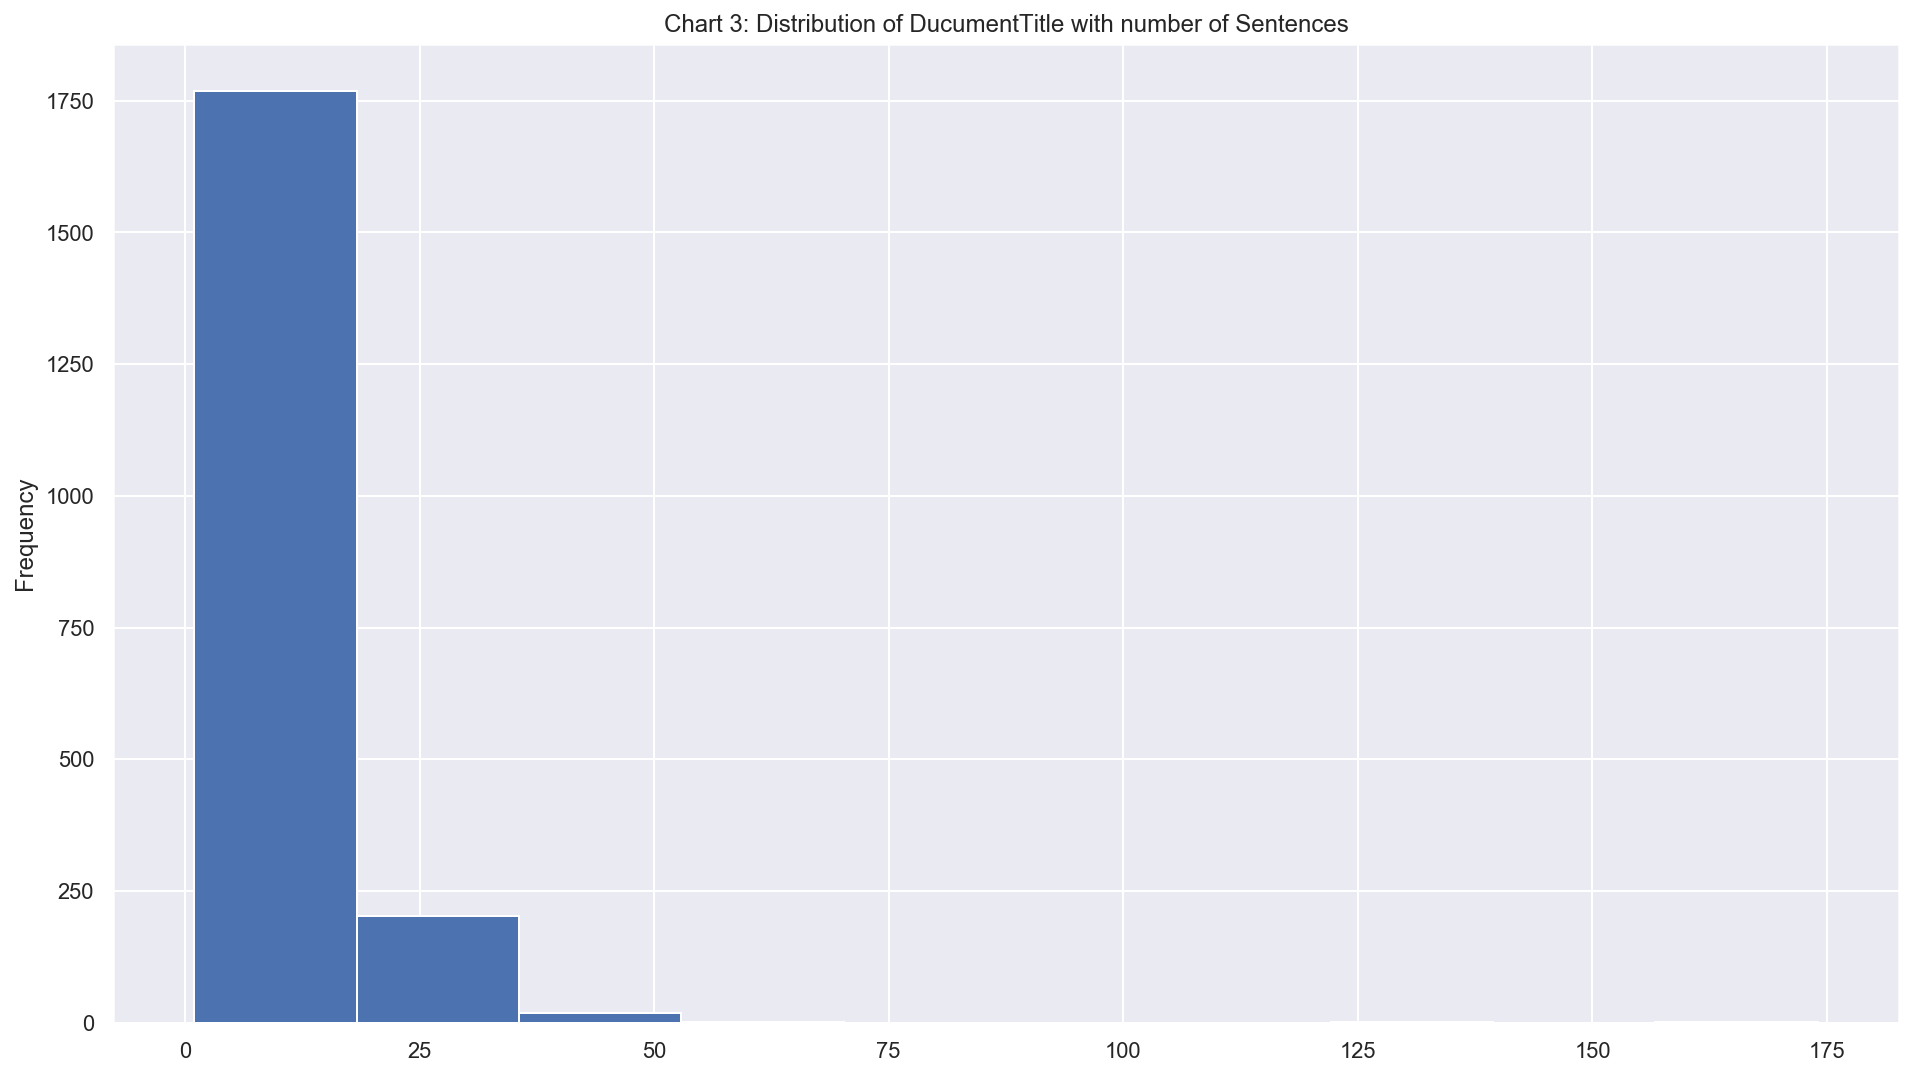

In [61]:
##Distribution of questions with number of Sentences

new_df.groupby(["DocumentTitle"])['SentenceID'].count().plot(kind='hist', title="Chart 3: Distribution of DucumentTitle with number of Sentences")
print(' ')
new_df.groupby(["DocumentTitle"])['SentenceID'].count().sort_values(ascending=False).head(10)

**Inference**:  
DocumentTitle with between 1 and 20 sentences have highest reoccuence. These DocumentTitles are about politics and political figures

### Machine Learning applications with the dataset
Basic analysis performed with that the dataset, it is easy to say dataset could be helped build the following ML application below: 
1. Automated Multiple choice Marker
1. question and answer
2. recommending documenttitle based on questions ask
3. chatbot to answer the questions

For the sake of simplicity, option 1 will be built. Basically the application will classification algorithm to identify correct answer out of option answers. 

**Asumption**:   
Every question should have aleast one correct answer (that is where Label is 1). Question, Sentence and Label are only features that will be used.

##### Example to support the assumption

In [62]:
new_df[new_df['QuestionID']=='Q1']

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito Moreno Glacier .,0
1,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0
2,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0
3,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice of a glacier .,1
4,Q1,how are glacier caves formed?,D1,Glacier cave,D1-4,"Glacier caves are often called ice caves , but this term is properly used to describe bedrock caves that contain year-round ice.",0


**Inference**:  
The example above supports the assumption. However, it may not be through with every question in the dataset

### Create a class for data processing -> zendesk_exercise/data_processing.py

In [63]:
from typing import *


@dataclass
class DataProcessing:
    '''
    This class will have different methods for data processing
    '''
    df: pd.DataFrame
    feature1: str
    feature2: str
    feature3: str
        
    def question_with_no_answer(self) -> List[str]:
        '''
        The function will take argument feature and use dataframe provided its class. 
        Parameters:
        ----------
       
        
        return
        ------
        List of strings
        
        '''
        qna_df = self.df.groupby([self.feature1, self.feature2])[self.feature3].count().reset_index()
        qna_df = qna_df.pivot(index=self.feature1, columns=self.feature2, values=self.feature3).reset_index()
        qna_null_df = qna_df[qna_df[1].isnull()]
        return  list(qna_null_df[self.feature1])
    
    def questions_with_answer(self) -> List[str]:
        '''
        The function will take no argument feature and use dataframe and feature  provided its class. 
        Parameters:
        ----------
       
        
        return
        ------
        List of strings
        '''
        question_list = self.question_with_no_answer()
        list_of_questions = set([item for item in self.df[self.feature1] if item not in question_list])
        return list_of_questions
    
    def question_df(self, question_list:List[str]) -> pd.DataFrame:
        '''
        The function will take argument list of strings and use dataframe and features provided its class. 
        Parameters:
        ----------
        
        return
        ------
        pd.Dataframe
        '''
        list_of_dfs = [self.df[self.df[self.feature1]==item] for item in question_list]
        question_df = pd.concat( list_of_dfs, axis=0)
        return  question_df
    
    def consolate_features(self) -> pd.DataFrame:
        '''
        function join two Series into one and return a new dataframe
        return
        -------
        pd.Dataframe
        '''
        feature = '_'.join([self.feature1, self.feature3])
        df[feature] = self.df[self.feature1] +' '+ self.df[self.feature3]
        return df
    

    def text_with_longest_length(self, s: pd.Series) -> dict:
        '''
        '''
        result = {}
        max_length = 0
        min_length= 5
        max_text = None
        min_text = None
        for item in s:
            length =len(str(item).split(' '))
            if length > max_length:
                max_length = length 
                max_text = item
        #result['max'] = [max_text, max_length]
        return [max_text, max_length]

In [64]:
if __name__ == '__main__':
    DataPro = DataProcessing(new_df, 'QuestionID', 'Label', 'SentenceID')
    question_with_no_answer=DataPro.question_with_no_answer()
    print(f'how many unique observable questions without answers: {len(question_with_no_answer)}')
    questions_with_answer = DataPro.questions_with_answer()
    print(f'how many unique observable questions with answers: {len(set(questions_with_answer))}')
    question_df = DataPro.question_df(questions_with_answer)
    print(f'how many observable questions in the question with answers dataframe: {len(question_df)}')
    print( f'Max length of questions; {DataPro.text_with_longest_length(question_df["Question"])[1]}')

how many unique observable questions without answers: 1245
how many unique observable questions with answers: 872
how many observable questions in the question with answers dataframe: 8666
Max length of questions; 19


**Inference**:  
The assumption can not be established since majority of the questions do not have right sentencse (Label 1). To continue the application, observations woth not correct sentences will be removed from the dataset

##### Sample of new dataframe -- question_df

In [65]:
## new dataframe
question_df.head()

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
18118,Q2671,WHAT IS NON BINDING?,D2493,Non-binding arbitration,D2493-0,"Non-binding arbitration is a type of arbitration in which the arbitrator makes a determination of the rights of the parties to the dispute, but this determination is not binding upon them, and no enforceable arbitration award is issued.",1
18119,Q2671,WHAT IS NON BINDING?,D2493,Non-binding arbitration,D2493-1,"The ""award"" is in effect an advisory opinion of the arbitrator's view of the respective merits of the parties cases.",0
18120,Q2671,WHAT IS NON BINDING?,D2493,Non-binding arbitration,D2493-2,Non-binding arbitration is used in connection with attempts to reach a negotiated settlement.,0
18121,Q2671,WHAT IS NON BINDING?,D2493,Non-binding arbitration,D2493-3,"The role of an arbitrator in non-binding arbitration is, on the surface, similar to that of a mediator in a mediation .",0
18122,Q2671,WHAT IS NON BINDING?,D2493,Non-binding arbitration,D2493-4,"However, the principal distinction is that whereas a mediator will try to help the parties find a middle ground to compromise at, the arbitrator remains totally removed from the settlement process and will only give a determination of liability and, if appropriate, an indication of the quantum of damages payable.",0


4. Distribution of Target Variable

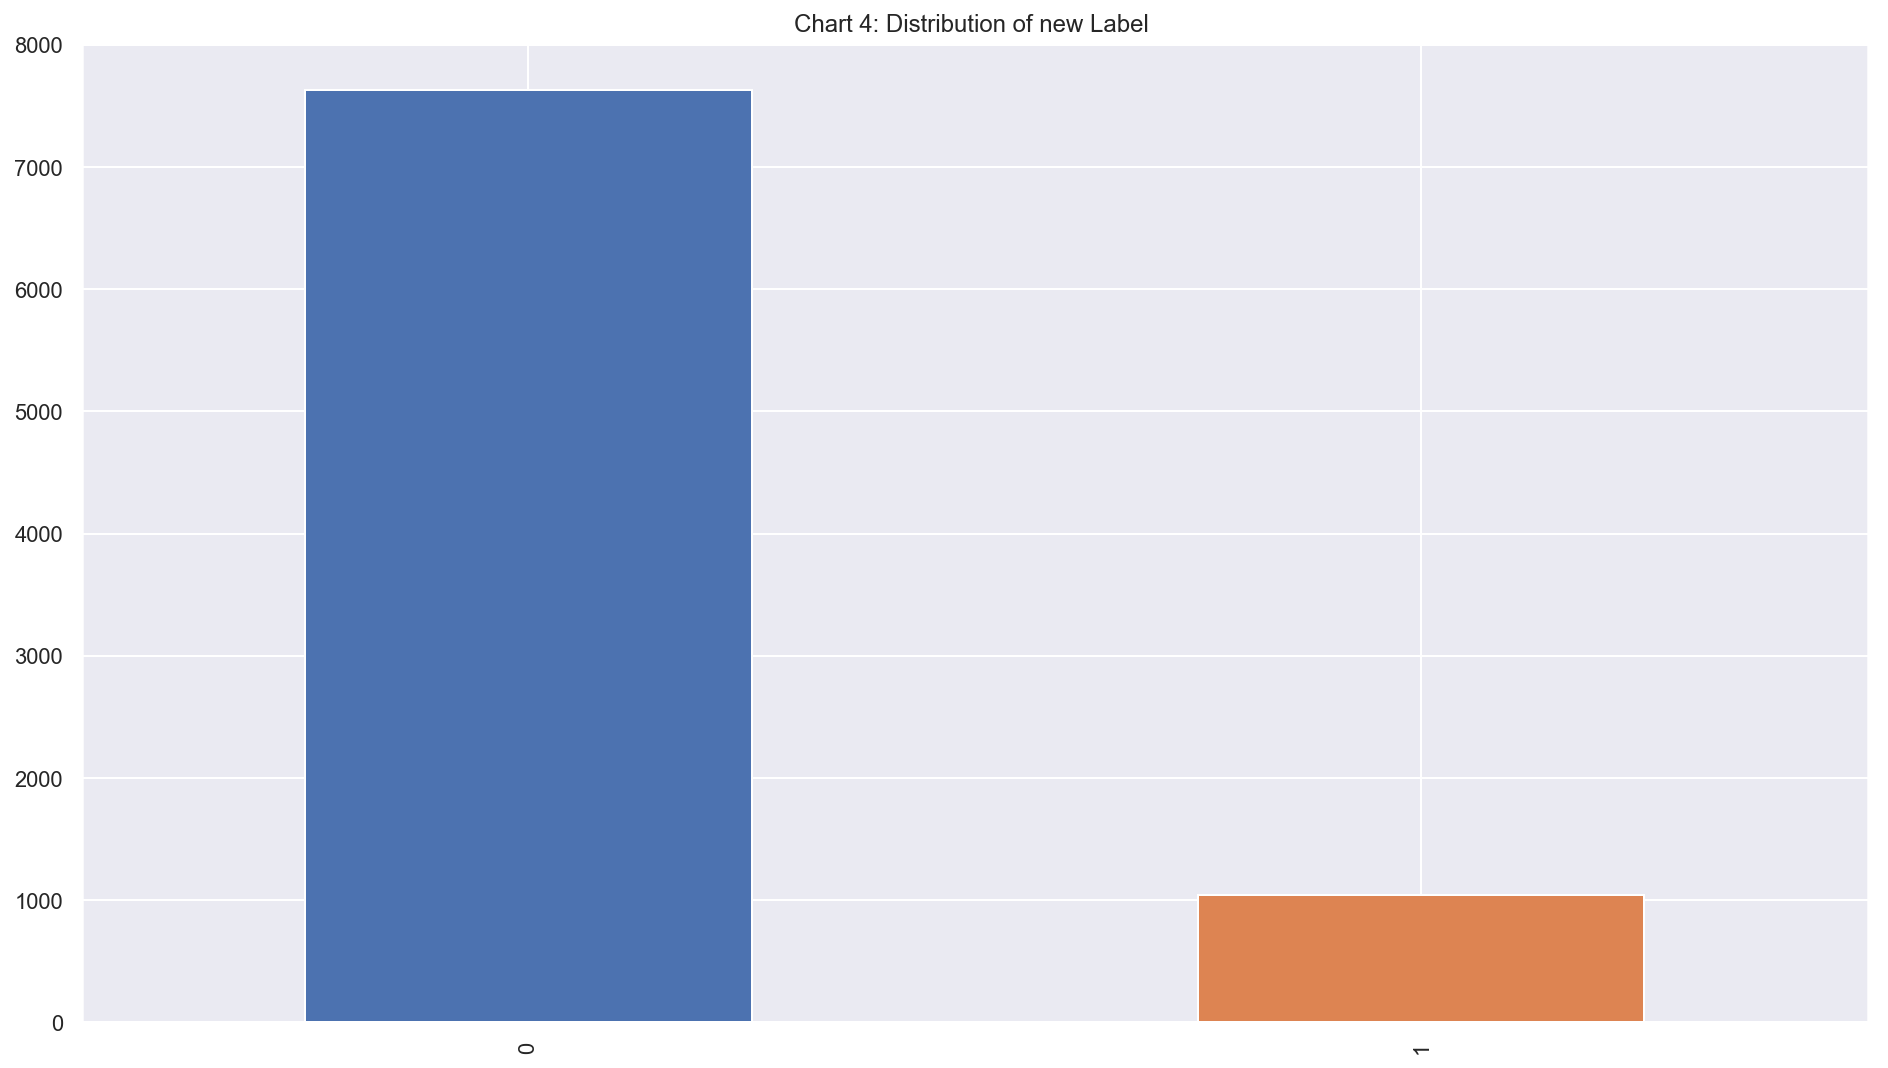

In [66]:
question_df['Label'].value_counts().plot(kind='bar', title="Chart 4: Distribution of new Label ")

### Apply Deep learning to the Problem

#### 1.  Feature Engineering
feature engineering would provide methodd to represent text as numbers. The one of the prefer approachs is *word embeddings*. Unlike tradition approaches such as bag of words and one-hot encoding, word embeddings could collect more information into fewer dimensions to map semantic meaning into a geometric space.  

There are two ways to get word embedding or convert the text into word embedding:
1. Train word embedding during the training of neural network
2. Using pretained word embeddings which could be used directly in the model.

In this exercise,only first option would be considered using tensorflow.

In [67]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

##### --> zendesk_exercise/feature_engineering.py

In [68]:
class FeatureEngineering(DataProcessing):
    '''
    Parameters:
    ----------
    df: pd.DataFrame
    feature1: str
    feature2: str
    feature3: str
    '''
    
    def __init__(self, df: pd.DataFrame, feature1:str, feature2:str, feature3:str):
        super().__init__(df, feature1, feature2, feature3)
        
    #feature = '_'.join([self.feature1, self.feature3])
        
    def join_features(self) -> pd.DataFrame:
        '''
        Function will return dataframe
        Return
        ------
        pd.DataFrame
        '''
        result = super().consolate_features()
        feature = '_'.join([self.feature1, self.feature3])
        return result[[feature, self.feature2]]
    
    def determine_maxlen(self) -> List[int]:
        '''
        The function will return list
        Return 
        ------
        List
        '''
        feature = '_'.join([self.feature1, self.feature3])
        s = self.join_features()[feature]
        #print(s)
        result = super().text_with_longest_length(s)
        return result[1]
               
    
    def dataset_split(self) -> pd.DataFrame:
        '''
        The function will return four dataframes
        Return
        ------
        pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, 
        '''
        feature = '_'.join([self.feature1, self.feature3])
        new_df = self.join_features()
        x_train,x_test, y_train,y_test = train_test_split(new_df[feature], new_df[self.feature2], test_size=0.25, random_state=0)
        return x_train,x_test, y_train,y_test
    
    def text_tokenize(self, text:pd.Series, num_words:int=None):
        '''
        The function will return function
        Return
        ------
        func
        '''
        tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True)
        tokenizer.fit_on_texts(text)
        return tokenizer
    
    def tokenize_sequence(self, text:pd.Series, func, maxlen:int, padding:str="post") -> List[list]:
        '''
        The function will return matrix
        Return
        ------
        Matrix
        '''
        new_text=func.texts_to_sequences(text)
        new_text= pad_sequences(new_text, padding=padding, maxlen=maxlen)
        return new_text

#### 2. Create model frame and embeeding Layer --> zendesk_exercise/classifer.py
The classifier will return probability score instead of binary

In [79]:
#Create the embedding layer
from dataclasses import dataclass

@dataclass
class QuestionAnswerClassifer:
    input_dim: int
    output_dim:int
    input_length:int
        
    def create_model(self):
        model = Sequential()
        model.add(layers.Embedding(input_dim=self.input_dim, output_dim=self.output_dim, input_length=self.input_length))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))
        return model
    
    def compile_model(self):
        model = self.create_model()
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model
    
    def plot_history(self, history):
        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        x = range(1, len(accuracy) + 1)
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(x, accuracy, 'b', label='Training accuracy')
        plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(x, loss, 'b', label='Training loss')
        plt.plot(x, val_loss, 'r', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()

### Model Prototype
##### Model Tracking  --> zendesk_exercise/train.py
mlflow allows prototyping of Ml model from training to deployment. It does three things:
1. Model Tracking: The MLflow Tracking component is an API and UI for logging parameters, code versions, metrics, and output files when running your machine learning code and for later visualizing the results.
2. Model Project: An MLflow Project is a format for packaging data science code in a reusable and reproducible way, based primarily on conventions.
3. Model Deployment: An MLflow Model is a standard format for packaging machine learning models that can be used in a variety of downstream tools—for example, real-time serving through a REST API or batch inference.


Maxlen:263
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 263, 100)          1798000   
_________________________________________________________________
flatten_11 (Flatten)         (None, 26300)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                1683264   
_________________________________________________________________
dense_31 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 3,489,713
Trainable params: 3,489,713
Non-trainable params: 0
_________________________________________________________________
 
Evaluation of model accuracy for trainingset
6499/6499 [==============================] - 1s 111

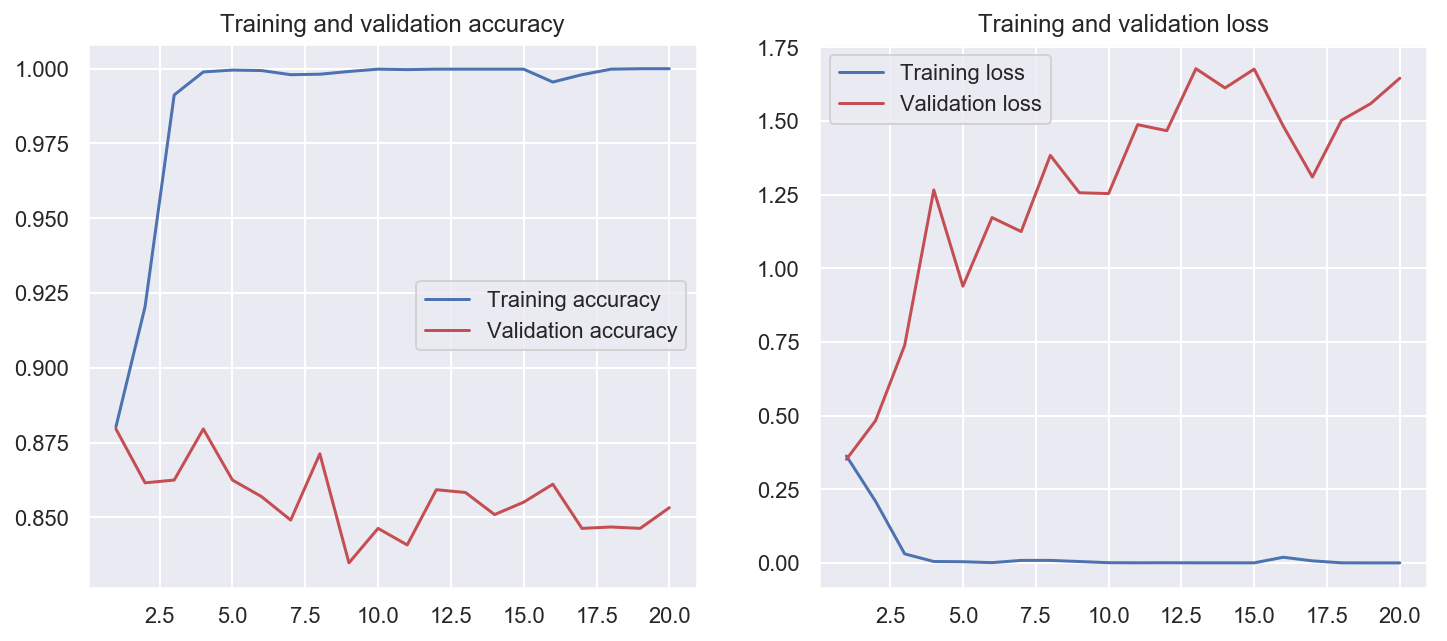

In [80]:
import sys
import warnings

import mlflow
import mlflow.keras
import mlflow.tensorflow


if __name__ == '__main__':
    
    Feature_Engineering = FeatureEngineering(new_df, 'Question', 'Label','Sentence')
    
    maxlen =  Feature_Engineering.determine_maxlen() + 10
    print(f'Maxlen:{maxlen}')
    
    #Split the dataset into train and test set
    question_df['Question_Sentence'] = question_df['Question'] +' '+ question_df['Sentence']
    features = question_df['Question_Sentence']
    target = question_df['Label']
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)
    
    tokenizer = Feature_Engineering.text_tokenize(x_train.values, num_words=5000)
    
    vocab_size = len(tokenizer.word_index) + 1
    
    xtrain= Feature_Engineering.tokenize_sequence(x_train, tokenizer, maxlen=maxlen)  
    xtest = Feature_Engineering.tokenize_sequence(x_test, tokenizer, maxlen=maxlen)  
    
    embedding_dim = 100 #int(sys.argv[1]) if len(sys.argv) > 1 else 50
    epochs = 20 #int(sys.argv[2]) if len(sys.argv) > 1 else 20
    batch_size = 10 #int(sys.argv[3]) if len(sys.argv) > 3 else 10
    
    with mlflow.start_run():
        cls = QuestionAnswerClassifer(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen)
        
        model = cls.compile_model()
        
        model.summary()
        print(' ')
        
        history = model.fit(xtrain, y_train, 
                    epochs=epochs, 
                    verbose=False,
                    validation_data=(xtest, y_test),
                    batch_size=batch_size)
        
        print('Evaluation of model accuracy for trainingset')
        train_loss, train_accuracy = model.evaluate(xtrain, y_train)
        print(' ')
        print('Evaluation of model accuracy for testset')
        test_loss, test_accuracy = model.evaluate(xtest, y_test)
        print(' ')
        cls.plot_history(history)
        
        #log the metrics and parameters
        mlflow.log_param('embedding', embedding_dim)
        mlflow.log_param('epochs', epochs)
        mlflow.log_param('batch_size', batch_size)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.log_metric("test_accuracy", test_accuracy)
       
    
        ## The function in MLflow saved the model as an artifact within the run.
        mlflow.keras.log_model(model, "model")

**Inference**  
Model performed very well with training data which it seems like overfitting. The performance on test dataset was not bad. To mitigate against overfitting, Dropout layers may need to be introduced after Dense layers.

#### Model Project

#### zendex_exercise/projects_file/Mlproject
name: zendesk_exercise

conda_env: conda.yml

entry_points:
    main:
        parameters:
            embedding_dim: {type: int, default: 100}
        command: "python train.py {embedding_dim} {epochs} {batch_size}"

#### zendex_exercise/projects_file/conda.yaml

name: zendesk_exercise
channels:
    - defaults
dependencies:
    - numpy==1.15.4
    - pandas==0.23.4
    - tensorflow==2.0.0a0
    - matplotlib==3.0.2
    - seaborn==0.9.0
    - sklearn==0.0
    - pip:
        - mlflow

### Model Deployment
I could have loved to build a web application that would present series of multiple answer-question that would allow users to select answers then generate results of their answers but due to my other schedules.

### Guidelines follow  fron training to deployment  

zendesk_exercise/
  |
  |-- Zendesk_ML_exercise.ipynb
  |
  |-- data_processing.py
  |
  |-- feature_engineering.py
  |
  |-- train.py
  |
  |-- requirements.txt
  |
  |-- mlruns/
  |
  |-- projects_file/
          |
          |-- conda.yaml
          |
          |-- Mlproject
   

**These must be done in terminal:**  

**First step:**  Believe that zendesk_exercise directory resides in Home directory

  cd ~/zendesk_exercise 
  
**Second step:** 

   pip install -r requirements.txt
 
**Third step:** 

  python train.py {embedding_dim} {epochs} {batch_size}
  
**Four step:**  Use the MLflow UI to compare the models that you have produced

     mlflow ui &
  
**Five step:**

    Open browser and paste http://localhost:5000
    
**Six step:** To run this project 

     mlflow run projects_file -P -embedding=50
     
**Seven Step:** To deploy the server, run (replace the path with your model’s actual path)  

    mlflow pyfunc serve -m mlruns/0/7c1a0d5c42844dcdb8f5191146925174/artifacts/model -p 1234
